In [ ]:
# Uninstall matplotlib, scanpy and scvi-tools
!pip uninstall matplotlib scanpy scvi-tools -y

# Reinstall specific versions of matplotlib and scanpy
!pip install matplotlib==3.7.1
!pip install scanpy==1.9.3
!pip install scvi-tools
!pip install scikit-misc
!pip install leidenalg
!pip install scikit-learn

import locale
def getpreferredencoding(do_not_decode=True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!pip install panda
import seaborn as sns
import scanpy as sc
import scvi
import scvi.external
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.sparse import csr_matrix
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score

Found existing installation: matplotlib 3.8.0
Uninstalling matplotlib-3.8.0:
  Successfully uninstalled matplotlib-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.0 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=ca21610db182438c10c45bb78f6ebb9ff7685d44bf523b7ca55286b39a650281
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/u

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
from google.colab import drive
drive.mount('/content/drive')

adata = sc.read_csv('/content/drive/My Drive/Project Single Cell Analysis/Rawdata/GSM5226574_C51ctr_raw_counts.csv').T
adata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AnnData object with n_obs × n_vars = 6099 × 34546

In [ ]:
print(adata.obs) # cell barcodes with no additional information
print(adata.var) # genes with no additional information
print(adata.X)   # counts: just a numpy array
print(adata.X.shape)

Empty DataFrame
Columns: []
Index: [TAGGTACCATGGCCAC-1_1, ATTCACTGTAACAGGC-1_1, TAACTTCCAACCACGC-1_1, TTGGGTACACGACAAG-1_1, AGGCCACAGAGTCACG-1_1, CACTGAAGTCGAAGCA-1_1, ACTGATGTCTGCACCT-1_1, TTACCGCCACTCAGAT-1_1, TTGGTTTTCCTAGCTC-1_1, TGGGAAGTCAGTGATC-1_1, CCACGAGTCTCTTAAC-1_1, ACTTCCGCACAACGCC-1_1, GGGAAGTAGCGACCCT-1_1, TGGTAGTTCCCGTGTT-1_1, CGCATAACATGCCGGT-1_1, TCTATCACAAGGCTTT-1_1, ATCCACCAGAGGTATT-1_1, TAACGACAGATGACCG-1_1, TCTTAGTGTATGAGGC-1_1, CACTTCGCAGTACTAC-1_1, GTCAAACAGAACGTGC-1_1, GCAACCGAGGGCAGGA-1_1, CATACTTTCATCACTT-1_1, AAGAACATCGGATTAC-1_1, GGGTATTGTACGATGG-1_1, CTGTAGATCAACGTGT-1_1, GTCATTTGTATCTCGA-1_1, CCTTGTGCAGAGGGTT-1_1, AAGTTCGCAACACGTT-1_1, TCATTCACAAATCAAG-1_1, TCCATGCCAACGACTT-1_1, TCCTTCTCAGTTTCAG-1_1, TGTGAGTCAAATGATG-1_1, AAACGAAGTACAGAGC-1_1, CAACCAAAGTATTCCG-1_1, CTTCTCTCAGAGACTG-1_1, TACAACGGTGGCTGAA-1_1, AACGGGACATGCCGGT-1_1, AACCAACGTTGGGAAC-1_1, TATATCCAGCGTCAGA-1_1, AGACAAACATCCCGTT-1_1, ATGACCAGTCTTCATT-1_1, CTTACCGTCAGACATC-1_1, CGGGACTGTTAGTTCG-1

**Preprocessing**

In [ ]:
sc.pp.filter_genes(adata, min_cells = 10) # only keep genes that are found in at least 10 of the cells

In [ ]:
adata

AnnData object with n_obs × n_vars = 6099 × 19896
    var: 'n_cells'

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3') # we only keep 2000 top variable genes

In [ ]:
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

**Doublet Detection**

In [ ]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df.index = df.index.map(lambda x: x[:-2])

df

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.282. Signaling Trainer to stop.


/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
TAGGTACCATGGCCAC-1,0.915452,0.084549,doublet
ATTCACTGTAACAGGC-1,0.829338,0.170661,doublet
TAACTTCCAACCACGC-1,0.263588,0.736412,singlet
TTGGGTACACGACAAG-1,0.843324,0.156676,doublet
AGGCCACAGAGTCACG-1,0.862919,0.137081,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1,0.024689,0.975311,singlet
CACTGGGGTCTACGTA-1,0.004526,0.995474,singlet
CATACTTGTAGAGGAA-1,0.002705,0.997295,singlet
TTTGGTTTCCACGGAC-1,0.001631,0.998369,singlet


In [ ]:
# count number of douplets and singles we have
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1250,1250
singlet,4849,4849


In [ ]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1,0.915452,0.084549,doublet,0.830903
ATTCACTGTAACAGGC-1,0.829338,0.170661,doublet,0.658677
TAACTTCCAACCACGC-1,0.263588,0.736412,singlet,-0.472823
TTGGGTACACGACAAG-1,0.843324,0.156676,doublet,0.686649
AGGCCACAGAGTCACG-1,0.862919,0.137081,doublet,0.725838
...,...,...,...,...
CGCCATTGTTTGCCGG-1,0.024689,0.975311,singlet,-0.950621
CACTGGGGTCTACGTA-1,0.004526,0.995474,singlet,-0.990948
CATACTTGTAGAGGAA-1,0.002705,0.997295,singlet,-0.994590
TTTGGTTTCCACGGAC-1,0.001631,0.998369,singlet,-0.996738


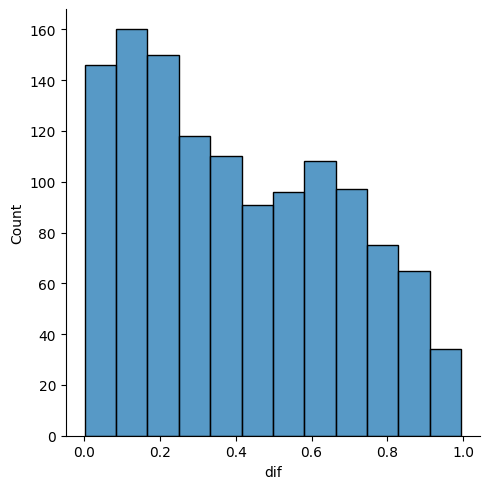

In [ ]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [ ]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.6)]
doublets

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1,0.915452,0.084549,doublet,0.830903
ATTCACTGTAACAGGC-1,0.829338,0.170661,doublet,0.658677
TTGGGTACACGACAAG-1,0.843324,0.156676,doublet,0.686649
AGGCCACAGAGTCACG-1,0.862919,0.137081,doublet,0.725838
CACTGAAGTCGAAGCA-1,0.864124,0.135876,doublet,0.728248
...,...,...,...,...
CCGATCTGTGTGAGCA-1,0.891409,0.108591,doublet,0.782818
ATACTTCTCATGCGGC-1,0.801970,0.198030,doublet,0.603940
GCACGTGTCACACCGG-1,0.802400,0.197600,doublet,0.604799
CAATACGCAATGTGGG-1,0.889660,0.110340,doublet,0.779319


In [ ]:
# reload the data
adata = sc.read_csv('/content/drive/My Drive/Project Single Cell Analysis/Rawdata/GSM5226574_C51ctr_raw_counts.csv').T

In [ ]:
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [ ]:
adata.obs  # doublet has label true

,doublet
TAGGTACCATGGCCAC-1_1,False
ATTCACTGTAACAGGC-1_1,False
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,False
AGGCCACAGAGTCACG-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [ ]:
adata = adata[~adata.obs.doublet] # keep all the label false

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 6099 × 34546
    obs: 'doublet'

In [ ]:
# label the genes
adata.var[adata.var.index.str.startswith('MT-')] # 13 Mitochondrial genes

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [ ]:
# find all that start with mt- and label them as false
adata.var['mt'] = adata.var.index.str.startswith('MT-')

<ipython-input-119-fcaa6fd31323>:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


In [ ]:
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


for ribosomal genes: using a list of known ribosomal genes from the broad institute, import directly in pandas

In [ ]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [ ]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [ ]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [ ]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [ ]:
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [ ]:
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,False
ATTCACTGTAACAGGC-1_1,False
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,False
AGGCCACAGAGTCACG-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [ ]:
# calcute QC matrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,8,0.001312,99.868831,8.0
AL627309.5,False,False,33,0.005411,99.458928,33.0
AL627309.4,False,False,4,0.000656,99.934415,4.0
AL669831.2,False,False,2,0.000328,99.967208,2.0
LINC01409,False,False,274,0.048697,95.507460,297.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [ ]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,False,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [ ]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC073270.1,False,False,0,0.000000,100.000000,0.0
AC073349.5,False,False,0,0.000000,100.000000,0.0
AC005482.1,False,False,0,0.000000,100.000000,0.0
SPDYE8P,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0
NEAT1,False,False,4546,5.314150,25.463191,32411.0
MBNL1,False,False,4554,2.877029,25.332022,17547.0
ZBTB20,False,False,4699,2.601082,22.954583,15864.0


In [ ]:
#filter out the genes that weren't in at least three cells
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


In [ ]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,False,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [ ]:
adata.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TGGTACAGTTGGTGTT-1_1,False,323,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,False,325,401.0,0.0,0.000000,0.0,0.000000
GTCGTTCTCCAAGGGA-1_1,False,300,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,False,308,401.0,0.0,0.000000,0.0,0.000000
CAGGGCTTCATGCGGC-1_1,False,330,401.0,7.0,1.745636,1.0,0.249377
...,...,...,...,...,...,...,...
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627


In [ ]:
adata.obs.sort_values('n_genes_by_counts') # none of is below 276

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,False,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,False,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,False,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,False,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,False,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
CACTGAAGTCGAAGCA-1_1,False,5487,12725.0,355.0,2.789784,82.0,0.644401
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


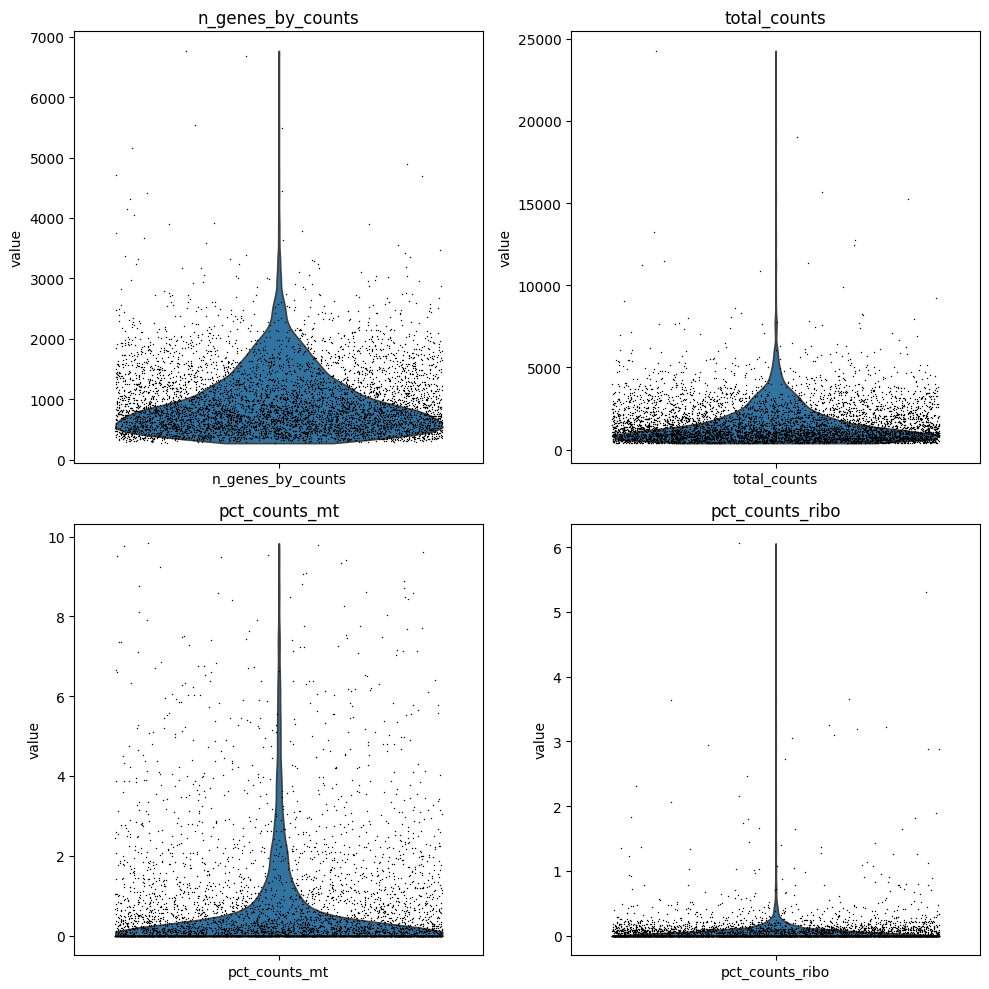

In [ ]:

# plotting each key individually and using 'ax' argument to customize:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Create a 2x2 grid of subplots
keys = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo']
for i, key in enumerate(keys):
    row = i // 2  # Calculate row index for subplot
    col = i % 2  # Calculate column index for subplot
    ax = axes[row, col]  # Get the specific subplot Axes object
    sc.pl.violin(adata, key, jitter=0.4, ax=ax, show=False)  # Plot to the specific subplot
    ax.set_title(key)  # Set subplot title

plt.tight_layout()
plt.show()

In [ ]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98) # 98 percentile
#upper_lim = 3000

In [ ]:
upper_lim  # 98 percentile ends up here

2479.08

In [ ]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,False,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [ ]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [ ]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CGTTCTGGTACTAGCT-1_1,False,2434,6047.0,6.0,0.099223,1.0,0.016537
CTGGCAGGTTCGGTAT-1_1,False,2444,5899.0,307.0,5.204272,5.0,0.084760
ACACCAACACAACGCC-1_1,False,2451,5497.0,0.0,0.000000,3.0,0.054575
CCTCAACCATACAGGG-1_1,False,2276,5434.0,38.0,0.699301,0.0,0.000000
ACAAAGATCCACAGGC-1_1,False,2310,5504.0,1.0,0.018169,1.0,0.018169
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [ ]:
adata = adata[adata.obs.pct_counts_mt < 20] # filter on mitochonrial 20

In [ ]:
adata = adata[adata.obs.pct_counts_ribo < 2] # filter on robosomal

In [ ]:
adata  #filter after daoublets and outliers

View of AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

now data is clean and we can do clustering and analysis

**Normalization**

In [ ]:
# sum of each cell
adata.X.sum(axis = 1)

array([6043., 5895., 5496., ...,  410.,  405.,  410.], dtype=float32)

In [ ]:
# normalize counts in each cell that total count ends up to the same value
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
adata.X.sum(axis = 1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [ ]:
sc.pp.log1p(adata) #change to log counts

In [ ]:
adata.X.sum(axis = 1)

array([3155.047  , 3218.0122 , 3416.0486 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

In [ ]:
adata

AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'

**TPM normalization**

In [ ]:
gene_lengths = np.array([24660])
# Calculate RPK (Reads Per Kilobase)
rpk = adata.X / gene_lengths

# Calculate the sum of RPKs per cell
rpk_per_cell = np.sum(rpk, axis=1)

# Calculate TPM
tpm = (rpk.T / rpk_per_cell).T * 1e6

# Store TPM in the AnnData object
adata.layers['TPM'] = tpm

# View the TPM values
print(adata.layers['TPM'])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
adata

AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'
    layers: 'TPM'

In [ ]:
adata.raw = adata # freez the data s it is now before start filtering based on variable genes

**Clustering**

In [ ]:
# selection of variable genes
sc.pp.highly_variable_genes(adata, n_top_genes = 2000) # find the 2000 most variable genes

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [ ]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011136,2.697174,1.153160
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028855,2.254608,-0.150810
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002331,1.702854,-1.776493
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.270478,2.286819,-0.055904
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006682,1.947490,-1.055700
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.153974,2.375807,0.206288
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.875225,2.469386,-0.406744
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.150268,2.265893,-0.117561
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002801,1.579830,-2.138971


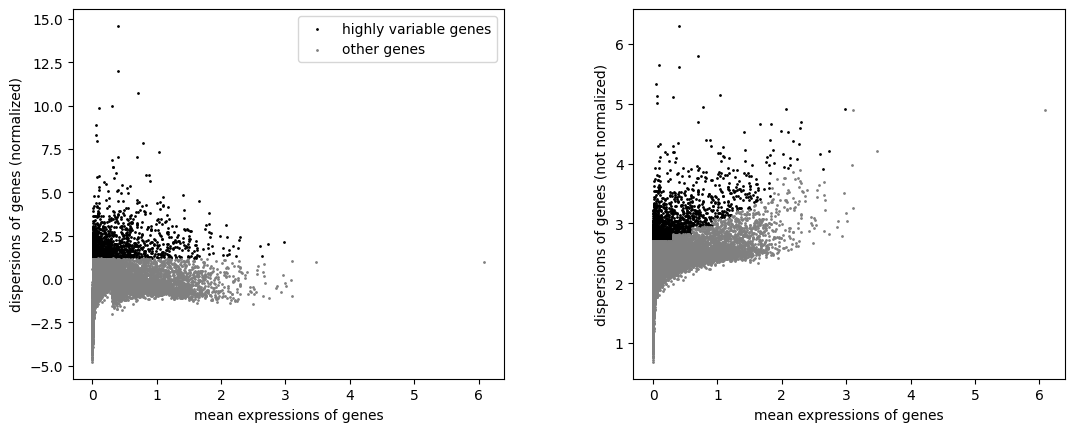

In [ ]:
sc.pl.highly_variable_genes(adata)


In [ ]:
# filter not highly variable genes
adata = adata[:, adata.var.highly_variable]

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'TPM'

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [ ]:
sc.pp.scale(adata, max_value=10)  # normalize each gene to the unit varince of that gene

In [ ]:
#pca : to further reduce dimentions of the data
sc.tl.pca(adata, svd_solver='arpack')  # this is by default 50 pcs

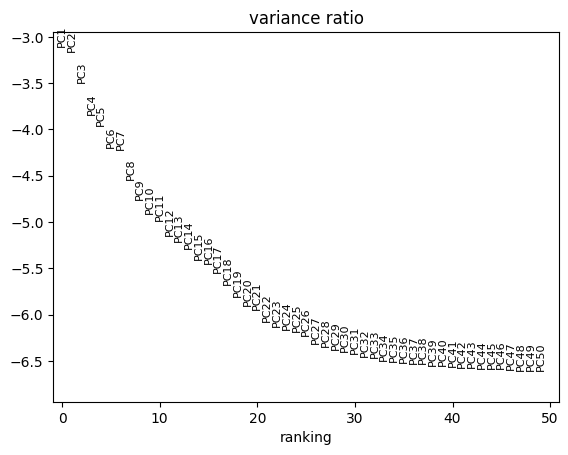

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [ ]:
#k-nn: (5, 10, 15, 20, 40)
#resolution: (0.5, 1.0. 1.5)
#n-pcs: (25, 30, 35, 40, 45, 50)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


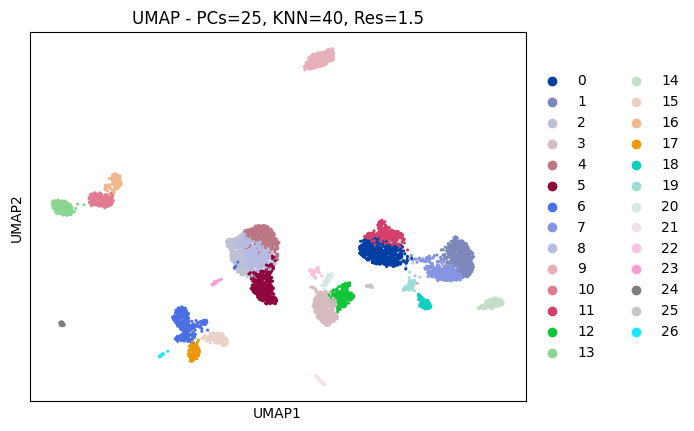

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


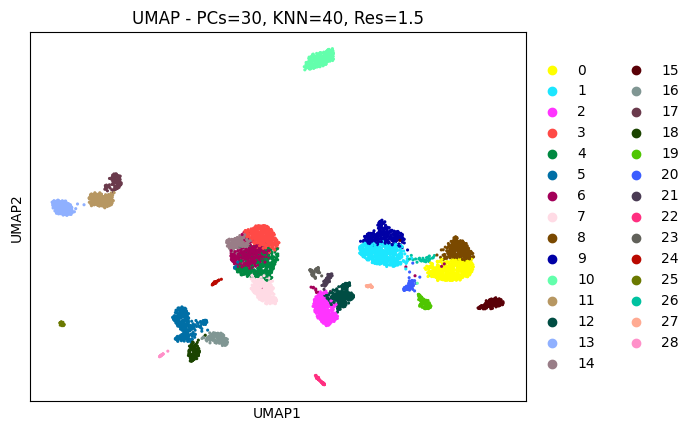

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


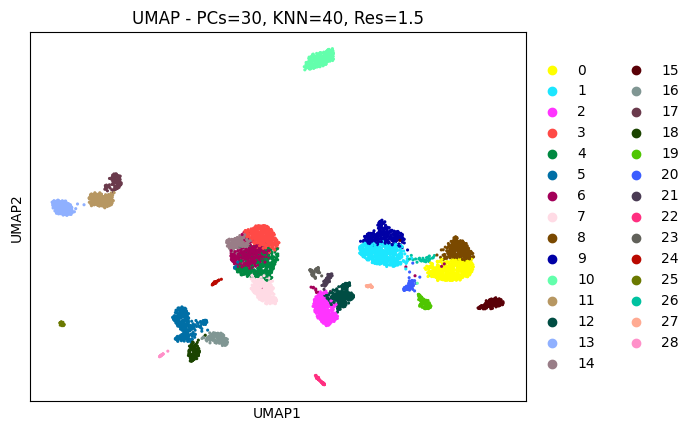

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


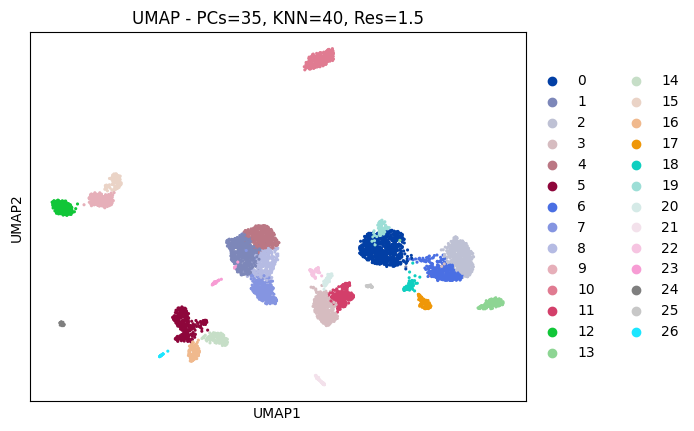

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


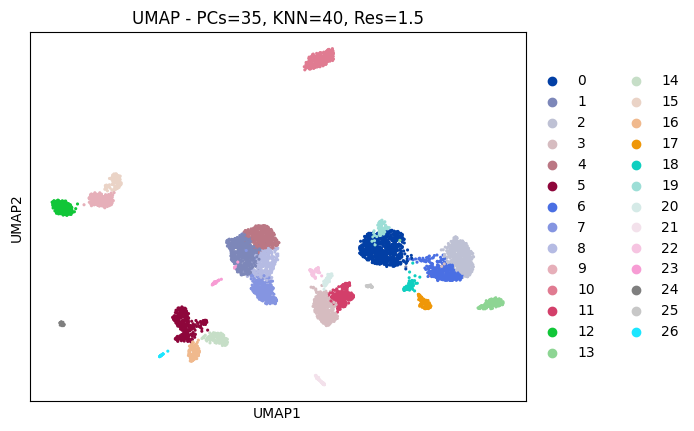

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


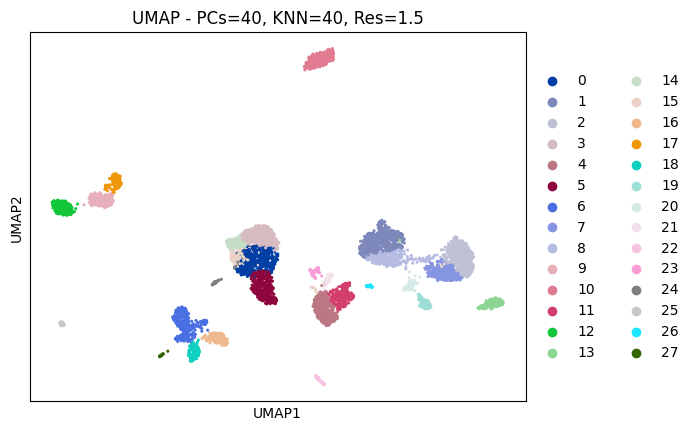

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


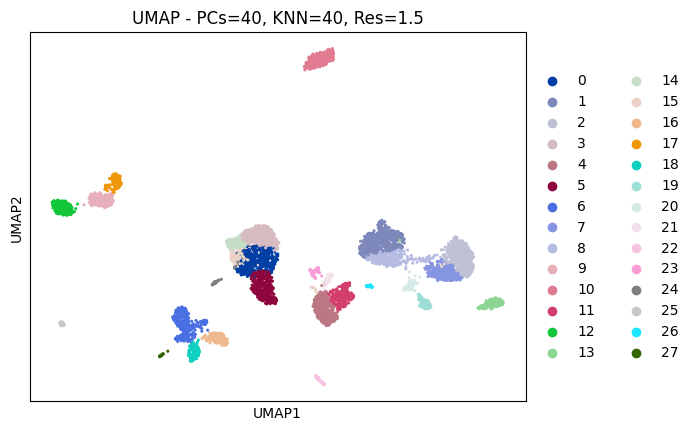

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


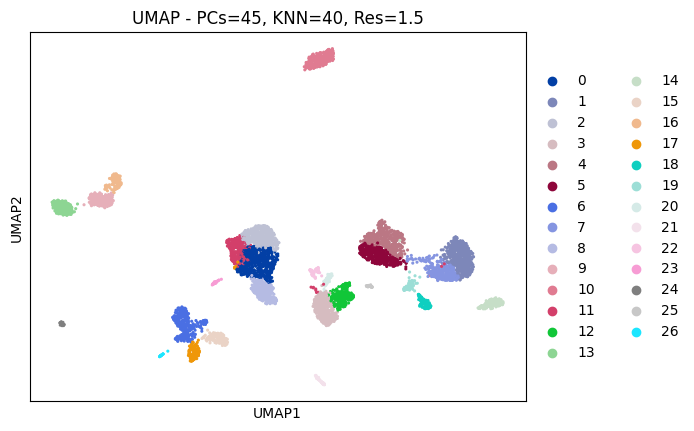

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


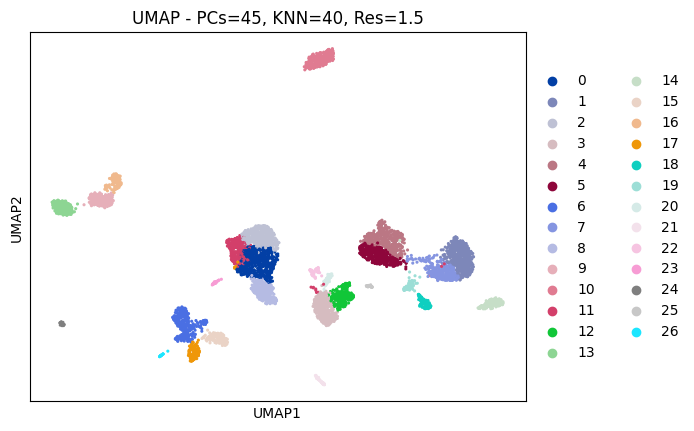

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


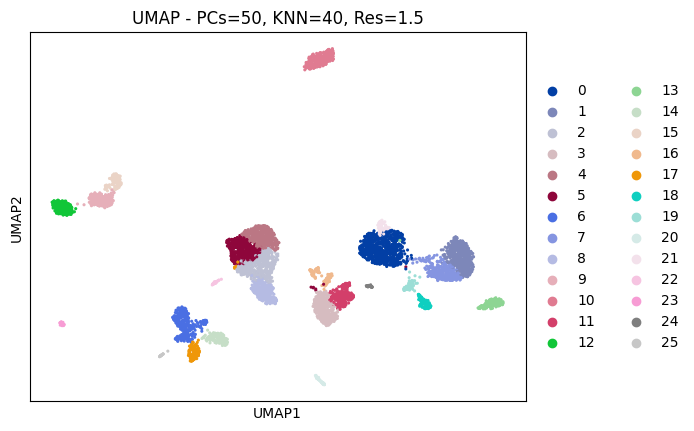

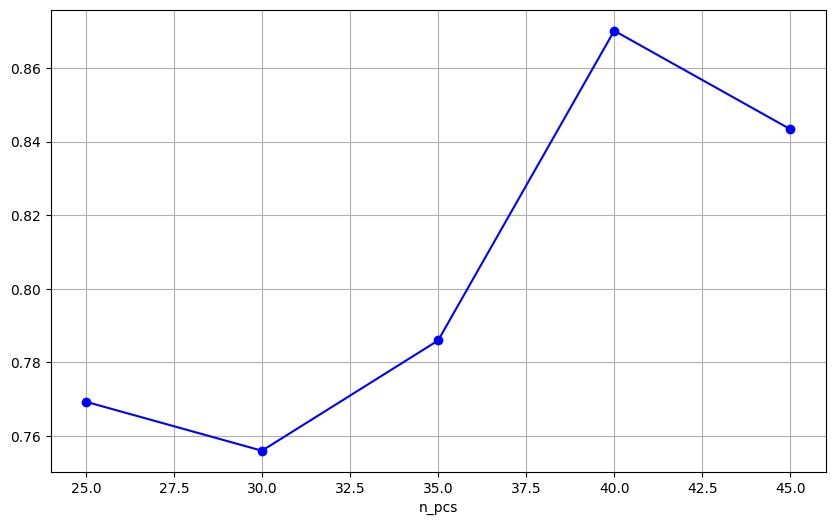

In [ ]:
# Hungarian matching function
def hungarian_match(labels_true, labels_pred):
    cont_matrix = confusion_matrix(labels_true, labels_pred)
    row_ind, col_ind = linear_sum_assignment(cont_matrix.max() - cont_matrix)
    matching_score = cont_matrix[row_ind, col_ind].sum()
    return matching_score, row_ind, col_ind

# ARI function to calculate cluster similarity
def calculate_ari(labels1, labels2):
    return adjusted_rand_score(labels1, labels2)

# List of n_pcs for comparison
n_pcs_list = [25, 30, 35, 40, 45, 50]
# Fixed parameters
n_neighbors = 40
resolution = 1.5

# Store ARI scores and cluster matchings
ari_scores = []
hungarian_matches = []


# Loop over n_pcs values
for n_pcs in n_pcs_list:
    # Compute neighbors and leiden clustering
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.leiden(adata, resolution=resolution)

    # Compute UMAP embedding
    sc.tl.umap(adata)

    # Save clustering result
    adata.obs[f'leiden_{n_pcs}'] = adata.obs['leiden'].to_numpy()

# Compare clusters and compute similarity
for i in range(len(n_pcs_list) - 1):
    labels_i = adata.obs[f'leiden_{n_pcs_list[i]}']
    labels_j = adata.obs[f'leiden_{n_pcs_list[i+1]}']

    # Calculate ARI for cluster similarity
    ari = calculate_ari(labels_i, labels_j)
    ari_scores.append(ari)

    # Apply Hungarian matching for cluster comparison
    matching_score, row_ind, col_ind = hungarian_match(labels_i, labels_j)
    hungarian_matches.append((row_ind, col_ind))

    # Plot UMAP for each clustering
    sc.pl.umap(adata, color=[f'leiden_{n_pcs_list[i]}'], title=f'UMAP - PCs={n_pcs_list[i]}, KNN={n_neighbors}, Res={resolution}')
    sc.pl.umap(adata, color=[f'leiden_{n_pcs_list[i+1]}'], title=f'UMAP - PCs={n_pcs_list[i+1]}, KNN={n_neighbors}, Res={resolution}')

# Plot the ARI scores for stability analysis
plt.figure(figsize=(10, 6))
plt.plot(n_pcs_list[:-1], ari_scores, marker='o', linestyle='-', color='b')
plt.xlabel('n_pcs')
plt.grid(True)
plt.show()


In [ ]:
adata

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_25', 'leiden_30', 'leiden_35', 'leiden_40', 'leiden_45', 'leiden_50'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_25_colors', 'leiden_30_colors', 'leiden_35_colors', 'leiden_40_colors', 'leiden_45_colors', 'leiden_50_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'TPM'
    obsp: 'distances', 'connectivities'

In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Step 1: Perform clustering at three resolutions
# Clustering 1: (Leiden with resolution = 0.5)
sc.tl.leiden(adata, resolution=0.5, key_added='leiden_0.5')

# Clustering 2: (Leiden with resolution = 1.0)
sc.tl.leiden(adata, resolution=1.0, key_added='leiden_1.0')

# Clustering 3: (Leiden with resolution = 1.5)
sc.tl.leiden(adata, resolution=1.5, key_added='leiden_1.5')

# Step 2: Construct cost (similarity) matrices using cluster overlaps
# Get labels from each clustering result
labels_05 = adata.obs['leiden_0.5'].astype(int).values
labels_10 = adata.obs['leiden_1.0'].astype(int).values
labels_15 = adata.obs['leiden_1.5'].astype(int).values

# Create pairwise confusion matrices for each set of labels
conf_matrix_05_10 = confusion_matrix(labels_05, labels_10)
conf_matrix_10_15 = confusion_matrix(labels_10, labels_15)

# Step 3: Apply the Hungarian algorithm for each pair of matrices
# Negate the matrices for Hungarian algorithm to minimize the cost
cost_matrix_05_10 = -conf_matrix_05_10
cost_matrix_10_15 = -conf_matrix_10_15

# Hungarian matching for each pair
row_ind_05_10, col_ind_05_10 = linear_sum_assignment(cost_matrix_05_10)
row_ind_10_15, col_ind_10_15 = linear_sum_assignment(cost_matrix_10_15)

# Step 4: Compute the clustering similarity scores
# Total similarity scores are the sums of matched intersections
total_similarity_05_10 = conf_matrix_05_10[row_ind_05_10, col_ind_05_10].sum()
total_similarity_10_15 = conf_matrix_10_15[row_ind_10_15, col_ind_10_15].sum()

# Normalize by the total number of data points
clustering_similarity_05_10 = total_similarity_05_10 / len(labels_05)
clustering_similarity_10_15 = total_similarity_10_15 / len(labels_10)

# Print results
print("Matched cluster pairs for 0.5 vs 1.0:", list(zip(row_ind_05_10, col_ind_05_10)))
print("Total similarity (0.5 vs 1.0):", total_similarity_05_10)
print("Clustering similarity score (0.5 vs 1.0):", clustering_similarity_05_10)

print("Matched cluster pairs for 1.0 vs 1.5:", list(zip(row_ind_10_15, col_ind_10_15)))
print("Total similarity (1.0 vs 1.5):", total_similarity_10_15)
print("Clustering similarity score (1.0 vs 1.5):", clustering_similarity_10_15)


Matched cluster pairs for 0.5 vs 1.0: [(0, 2), (1, 0), (2, 1), (3, 4), (4, 5), (5, 7), (6, 6), (7, 8), (8, 10), (9, 16), (10, 11), (11, 14), (12, 12), (13, 18), (14, 19), (15, 20), (16, 22), (17, 3), (18, 9), (19, 13), (20, 15), (21, 17), (22, 21)]
Total similarity (0.5 vs 1.0): 4793
Clustering similarity score (0.5 vs 1.0): 0.8041946308724832
Matched cluster pairs for 1.0 vs 1.5: [(0, 1), (1, 0), (2, 2), (3, 4), (4, 3), (5, 6), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12), (11, 13), (12, 14), (13, 15), (14, 16), (15, 17), (16, 18), (17, 19), (18, 20), (19, 22), (20, 23), (21, 24), (22, 25), (23, 5), (24, 7), (25, 21)]
Total similarity (1.0 vs 1.5): 5159
Clustering similarity score (1.0 vs 1.5): 0.8656040268456375


Similarity between clusters for n_pcs=25 and n_pcs=30: 0.866275167785235
Similarity between clusters for n_pcs=25 and n_pcs=35: 0.8802013422818792
Similarity between clusters for n_pcs=25 and n_pcs=40: 0.8508389261744966
Similarity between clusters for n_pcs=25 and n_pcs=45: 0.874496644295302
Similarity between clusters for n_pcs=25 and n_pcs=50: 0.8563758389261745
Similarity between clusters for n_pcs=30 and n_pcs=35: 0.8493288590604027
Similarity between clusters for n_pcs=30 and n_pcs=40: 0.8684563758389262
Similarity between clusters for n_pcs=30 and n_pcs=45: 0.8669463087248322
Similarity between clusters for n_pcs=30 and n_pcs=50: 0.8451342281879195
Similarity between clusters for n_pcs=35 and n_pcs=40: 0.8471476510067114
Similarity between clusters for n_pcs=35 and n_pcs=45: 0.8701342281879194
Similarity between clusters for n_pcs=35 and n_pcs=50: 0.9409395973154362
Similarity between clusters for n_pcs=40 and n_pcs=45: 0.9199664429530201
Similarity between clusters for n_pcs=40

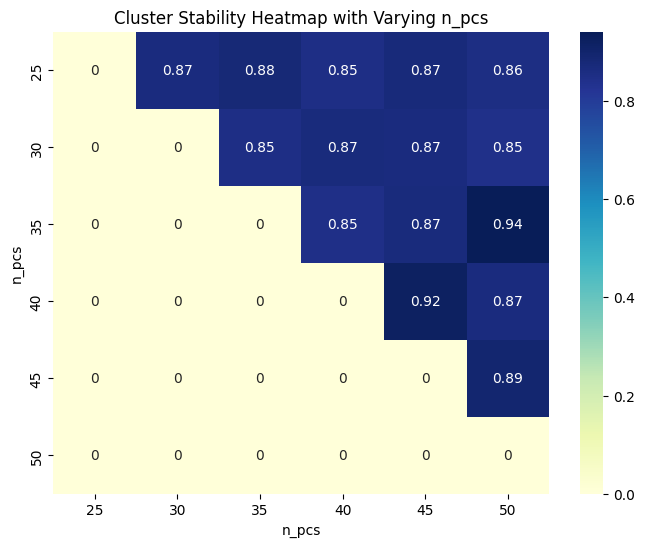

In [ ]:
def compare_clusters_with_hungarian_npcs(adata, n_pcs_values, fixed_neighbors=40, fixed_resolution=1.5):
    """
    Compares clustering results using different n_pcs values while keeping
    neighbors and resolution fixed. Uses the Hungarian algorithm to compute similarity.

    Parameters:
    adata: AnnData object
    n_pcs_values: list of int, list of n_pcs values for clustering runs
    fixed_neighbors: int, fixed number of neighbors for k-NN graph construction
    fixed_resolution: float, fixed resolution for clustering

    Returns:
    clustering_similarities: dict, similarity scores for each clustering pair
    """

    # Perform clustering for each n_pcs value
    for n_pcs in n_pcs_values:
        sc.pp.neighbors(adata, n_neighbors=fixed_neighbors, n_pcs=n_pcs)
        sc.tl.leiden(adata, resolution=fixed_resolution, key_added=f'leiden_pcs{n_pcs}')

    # Retrieve cluster labels
    labels_dict = {n_pcs: adata.obs[f'leiden_pcs{n_pcs}'].astype(int).values for n_pcs in n_pcs_values}

    clustering_similarities = {}

    # Calculate similarity for each pair of clusterings with different n_pcs
    for pcs_a, labels_a in labels_dict.items():
        for pcs_b, labels_b in labels_dict.items():
            if pcs_a < pcs_b:  # Avoid duplicate comparisons
                # Compute confusion matrix
                conf_matrix = confusion_matrix(labels_a, labels_b)

                # Apply Hungarian algorithm
                cost_matrix = -conf_matrix  # Convert to minimization problem
                row_ind, col_ind = linear_sum_assignment(cost_matrix)

                # Calculate similarity
                total_similarity = conf_matrix[row_ind, col_ind].sum()
                similarity_score = total_similarity / len(labels_a)

                # Store results
                clustering_similarities[(pcs_a, pcs_b)] = similarity_score
                print(f"Similarity between clusters for n_pcs={pcs_a} and n_pcs={pcs_b}: {similarity_score}")

    return clustering_similarities

# Example usage
n_pcs_values = [25, 30, 35, 40, 45, 50]  # Different n_pcs values to test
similarities = compare_clusters_with_hungarian_npcs(adata, n_pcs_values)

# Convert to heatmap-friendly format
similarity_matrix = np.zeros((len(n_pcs_values), len(n_pcs_values)))
for (i, pcs_a) in enumerate(n_pcs_values):
    for (j, pcs_b) in enumerate(n_pcs_values):
        if pcs_a < pcs_b:
            similarity_matrix[i, j] = similarities.get((pcs_a, pcs_b), 0)

# Plot heatmap of similarity scores
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=n_pcs_values, yticklabels=n_pcs_values, cmap="YlGnBu")
plt.title("Cluster Stability Heatmap with Varying n_pcs")
plt.xlabel("n_pcs")
plt.ylabel("n_pcs")
plt.show()


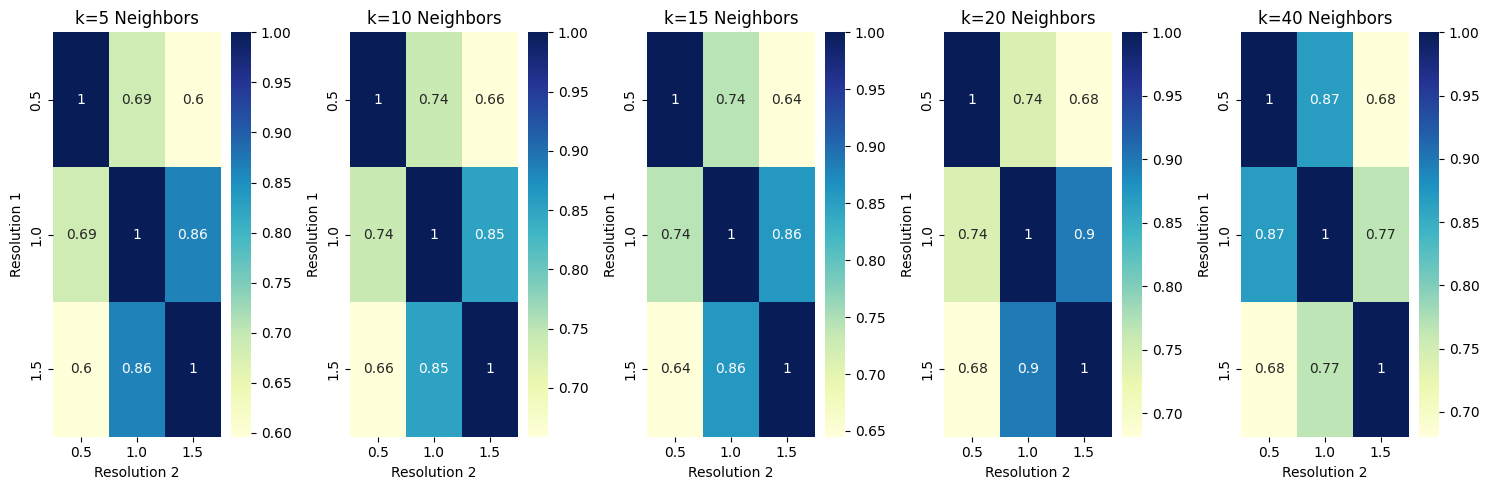

In [ ]:
def compare_clusters_with_hungarian(adata, k, resolution_1, resolution_2):
    """
    Compares clusters from two different resolutions using the Hungarian algorithm after applying k-NN.

    Parameters:
    adata: AnnData object
    k: int, number of neighbors for both clustering runs
    resolution_1: float, first resolution value for Leiden clustering
    resolution_2: float, second resolution value for Leiden clustering

    Returns:
    clustering_similarity: float, similarity score between two clusterings
    """
    # Perform clustering with the first resolution
    sc.pp.neighbors(adata, n_neighbors=k, n_pcs=40)  # Construct k-NN graph with k neighbors
    sc.tl.leiden(adata, resolution=resolution_1, key_added=f'leiden_k{k}_res{resolution_1}')

    # Perform clustering with the second resolution
    sc.tl.leiden(adata, resolution=resolution_2, key_added=f'leiden_k{k}_res{resolution_2}')

    # Get labels from both clustering results
    labels_res1 = adata.obs[f'leiden_k{k}_res{resolution_1}'].astype(int).values
    labels_res2 = adata.obs[f'leiden_k{k}_res{resolution_2}'].astype(int).values

    # Create confusion matrix
    conf_matrix = confusion_matrix(labels_res1, labels_res2)

    # Apply Hungarian algorithm to match clusters
    cost_matrix = -conf_matrix  # Negate to maximize similarity
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Calculate total similarity
    total_similarity = conf_matrix[row_ind, col_ind].sum()

    # Normalize by the total number of cells
    clustering_similarity = total_similarity / len(labels_res1)

    return clustering_similarity


# Step 1: Define different k-NN and resolution values to compare
k_values = [5, 10, 15, 20, 40]  # Different numbers of neighbors
resolution_values = [0.5, 1.0, 1.5]  # Different Leiden clustering resolutions

# Step 2: Create an empty matrix to store similarity scores
similarity_matrix = np.zeros((len(k_values), len(resolution_values), len(resolution_values)))

# Step 3: Compute clustering similarity for each pair of (k, resolution_1, resolution_2)
for i, k in enumerate(k_values):
    for j, res1 in enumerate(resolution_values):
        for k_idx, res2 in enumerate(resolution_values):
            similarity_matrix[i, j, k_idx] = compare_clusters_with_hungarian(adata, k, res1, res2)

# Step 4: Plot similarity matrix using seaborn's heatmap for each k-value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    sns.heatmap(similarity_matrix[i], annot=True, cmap="YlGnBu", ax=axes[i],
                xticklabels=resolution_values, yticklabels=resolution_values)
    axes[i].set_title(f'k={k} Neighbors')
    axes[i].set_xlabel('Resolution 2')
    axes[i].set_ylabel('Resolution 1')

plt.tight_layout()
plt.show()


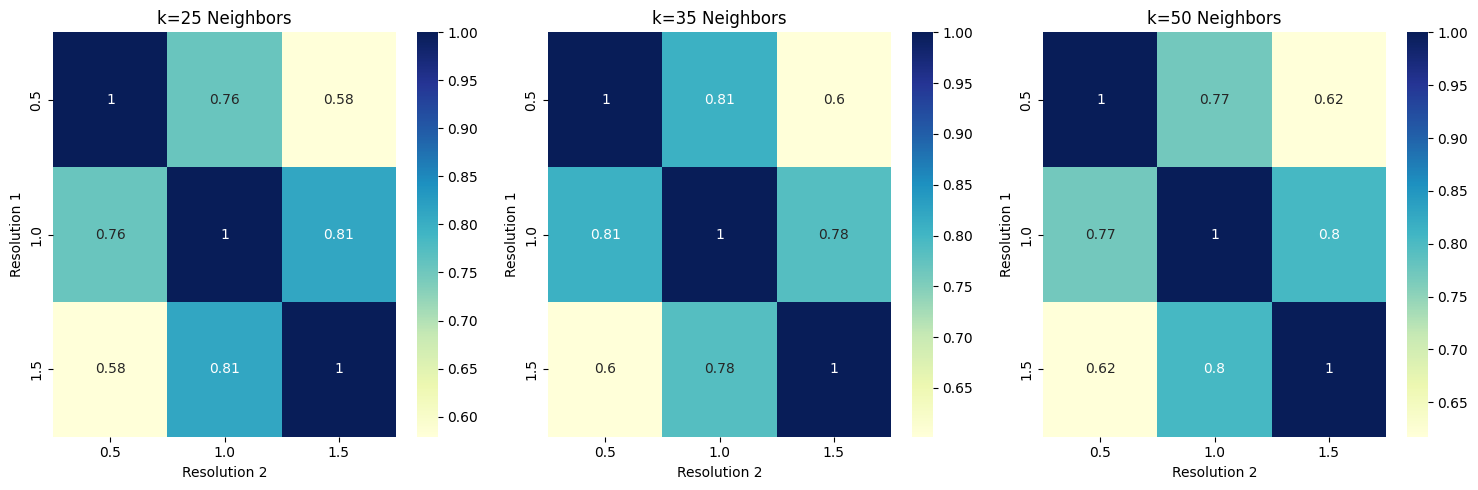

In [ ]:
# Compare Similarity by changing the resolution and K-NN

def compare_clusters_with_hungarian(adata, k, resolution_1, resolution_2):
    """
    Compares clusters from two different resolutions using the Hungarian algorithm after applying k-NN.

    Parameters:
    adata: AnnData object
    k: int, number of neighbors for both clustering runs
    resolution_1: float, first resolution value for Leiden clustering
    resolution_2: float, second resolution value for Leiden clustering

    Returns:
    clustering_similarity: float, similarity score between two clusterings
    """
    # Perform clustering with the first resolution
    sc.pp.neighbors(adata, n_neighbors=k, n_pcs=30)  # Construct k-NN graph with k neighbors
    sc.tl.leiden(adata, resolution=resolution_1, key_added=f'leiden_k{k}_res{resolution_1}')

    # Perform clustering with the second resolution
    sc.tl.leiden(adata, resolution=resolution_2, key_added=f'leiden_k{k}_res{resolution_2}')

    # Get labels from both clustering results
    labels_res1 = adata.obs[f'leiden_k{k}_res{resolution_1}'].astype(int).values
    labels_res2 = adata.obs[f'leiden_k{k}_res{resolution_2}'].astype(int).values

    # Create confusion matrix
    conf_matrix = confusion_matrix(labels_res1, labels_res2)

    # Apply Hungarian algorithm to match clusters
    cost_matrix = -conf_matrix  # Negate to maximize similarity
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Calculate total similarity
    total_similarity = conf_matrix[row_ind, col_ind].sum()

    # Normalize by the total number of cells
    clustering_similarity = total_similarity / len(labels_res1)

    return clustering_similarity


# Step 1: Define different k-NN and resolution values to compare
k_values = [25, 35, 50]  # Different numbers of neighbors
resolution_values = [0.5, 1.0, 1.5]  # Different Leiden clustering resolutions

# Step 2: Create an empty matrix to store similarity scores
similarity_matrix = np.zeros((len(k_values), len(resolution_values), len(resolution_values)))

# Step 3: Compute clustering similarity for each pair of (k, resolution_1, resolution_2)
for i, k in enumerate(k_values):
    for j, res1 in enumerate(resolution_values):
        for k_idx, res2 in enumerate(resolution_values):
            similarity_matrix[i, j, k_idx] = compare_clusters_with_hungarian(adata, k, res1, res2)

# Step 4: Plot similarity matrix using seaborn's heatmap for each k-value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    sns.heatmap(similarity_matrix[i], annot=True, cmap="YlGnBu", ax=axes[i],
                xticklabels=resolution_values, yticklabels=resolution_values)
    axes[i].set_title(f'k={k} Neighbors')
    axes[i].set_xlabel('Resolution 2')
    axes[i].set_ylabel('Resolution 1')

plt.tight_layout()
plt.show()


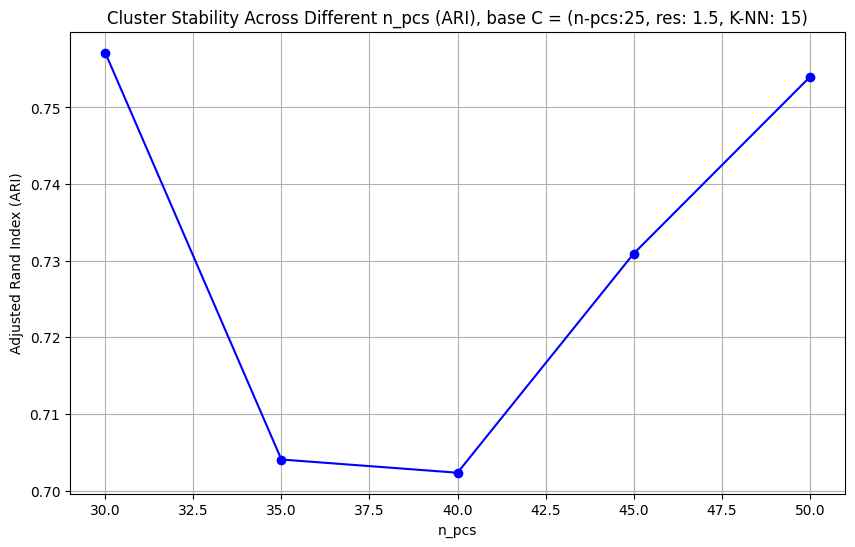

In [ ]:
# Comparing similarity with base n-pcs = 25

import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Define parameters
n_neighbors = 15  # Fixed number of neighbors
resolution = 1.5  # Fixed resolution
n_pcs_list = [25, 30, 35, 40, 45, 50]  # Different values of n_pcs

# Step 1: Ensure enough PCs are calculated by setting `n_comps` to the maximum value in `n_pcs_list`
sc.pp.pca(adata, n_comps=max(n_pcs_list))

# Store ARI scores for comparison to baseline (n_pcs=25)
ari_scores = []

# Perform clustering for the baseline n_pcs=25
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=25)
sc.tl.leiden(adata, resolution=resolution, key_added='leiden_25')
baseline_labels = adata.obs['leiden_25'].astype(int).values

# Loop over other n_pcs values and perform clustering, then calculate ARI compared to baseline
for n_pcs in n_pcs_list[1:]:  # Skip 25 as it's the baseline
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.leiden(adata, resolution=resolution, key_added=f'leiden_{n_pcs}')

    # Retrieve current labels and calculate ARI with respect to baseline (n_pcs=25)
    labels_curr = adata.obs[f'leiden_{n_pcs}'].astype(int).values
    ari_score = adjusted_rand_score(baseline_labels, labels_curr)
    ari_scores.append(ari_score)

# Plot the ARI scores to show similarity across different n_pcs values with n_pcs=25 as baseline
plt.figure(figsize=(10, 6))
plt.plot(n_pcs_list[1:], ari_scores, marker='o', color='b', linestyle='-')
plt.title("Cluster Stability Across Different n_pcs (ARI), base C = (n-pcs:25, res: 1.5, K-NN: 15)")
plt.xlabel("n_pcs")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(True)
plt.show()


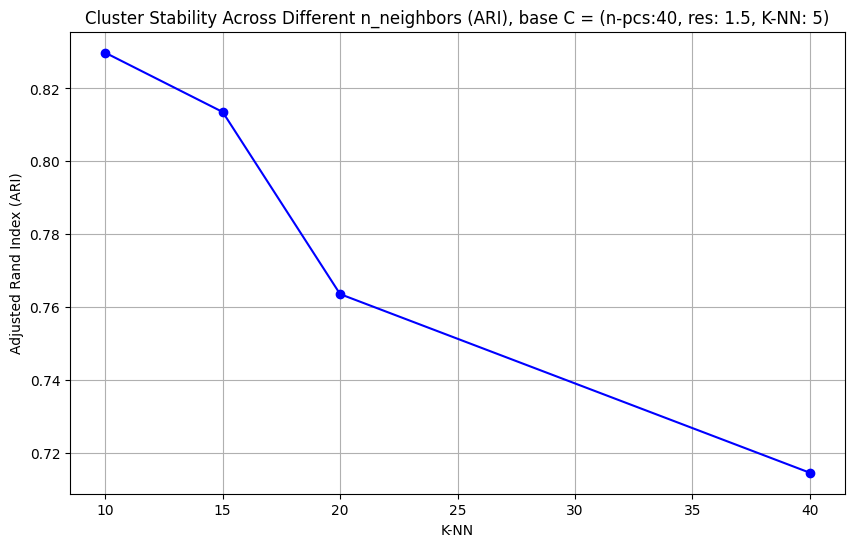

In [ ]:
# Comparing similarity with base K_NN = 5
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Define base parameters
n_pcs = 40
resolution = 1.5
n_neighbors_list = [10, 15, 20, 40]  # Values of n_neighbors to compare with the baseline

# Step 1: Create the baseline clustering with n_neighbors=5
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=n_pcs)
sc.tl.leiden(adata, resolution=resolution, key_added='leiden_base')
baseline_labels = adata.obs['leiden_base'].astype(int).values

# Store ARI scores for comparison to baseline
ari_scores = []

# Step 2: Loop over other n_neighbors values and perform clustering, then calculate ARI with baseline
for n_neighbors in n_neighbors_list:
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.leiden(adata, resolution=resolution, key_added=f'leiden_{n_neighbors}')

    # Retrieve current labels and calculate ARI with respect to the baseline (n_neighbors=5)
    labels_curr = adata.obs[f'leiden_{n_neighbors}'].astype(int).values
    ari_score = adjusted_rand_score(baseline_labels, labels_curr)
    ari_scores.append(ari_score)

# Plot the ARI scores to show similarity across different n_neighbors values with n_neighbors=5 as baseline
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, ari_scores, marker='o', color='b', linestyle='-')
plt.title("Cluster Stability Across Different n_neighbors (ARI), base C = (n-pcs:40, res: 1.5, K-NN: 5)")
plt.xlabel("K-NN")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(True)
plt.show()
